In [23]:
import numpy as np
np.random.seed(123)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras.callbacks import History

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

15269888/15296311 [============================>.] - ETA: 0s

In [6]:
print(X_train.shape)

(60000, 28, 28)


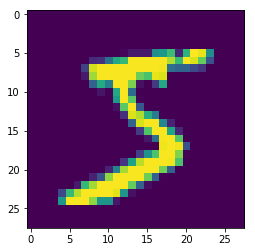

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline  
plt.imshow(X_train[0])

In [9]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
print(X_train.shape)

(60000, 1, 28, 28)


In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(y_train.shape)
print(y_train[:10])
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(Y_train.shape)

(60000,)
[5 0 4 1 9 2 1 3 1 4]
(60000, 10)


In [31]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))
print(model.output_shape)

# parameters: number of filters, size of filter
model.add(Convolution2D(32, 3, 3, activation='relu'))
# Reduce number of parameters, take max of four
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Make weights one-dimensional to pass them to fully-connected layer
model.add(Flatten())
# parameter: output size
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

(None, 32, 26, 26)


In [32]:
# Compile model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, batch_size=32,
         nb_epoch=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 164s - loss: 2.3015 - acc: 0.1116   
Epoch 2/10
60000/60000 [==============================] - 192s - loss: 2.3015 - acc: 0.1122   
Epoch 3/10
60000/60000 [==============================] - 177s - loss: 2.3014 - acc: 0.1124   
Epoch 4/10
60000/60000 [==============================] - 174s - loss: 2.3014 - acc: 0.1124   
Epoch 5/10
60000/60000 [==============================] - 192s - loss: 2.3014 - acc: 0.1124   
Epoch 6/10
60000/60000 [==============================] - 188s - loss: 2.3014 - acc: 0.1124   
Epoch 7/10
60000/60000 [==============================] - 204s - loss: 2.3013 - acc: 0.1124   
Epoch 8/10
60000/60000 [==============================] - 190s - loss: 2.3013 - acc: 0.1124   
Epoch 9/10
60000/60000 [==============================] - 188s - loss: 2.3014 - acc: 0.1124   
Epoch 10/10
60000/60000 [==============================] - 175s - loss: 2.3012 - acc: 0.1124   


In [33]:
score = model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 6s     


In [35]:
print('Test score: ', score[0])
print('Test accuracy: ', score[1])
print(model.predict_classes(X_test[1:5]))
print(Y_test[1:5])

Test score:  2.3011378833770753
Test accuracy:  0.1135
4/4 [==============================] - 0s
[1 1 1 1]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [41]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pformat(history.history)

"{   'acc': [   0.11161666666666667,\n               0.11223333333333334,\n               0.11236666666666667,\n               0.11236666666666667,\n               0.11236666666666667,\n               0.11236666666666667,\n               0.11236666666666667,\n               0.11236666666666667,\n               0.11236666666666667,\n               0.11236666666666667],\n    'loss': [   2.3014987589518228,\n                2.3014711232503253,\n                2.301363733291626,\n                2.3013558419545492,\n                2.301352217610677,\n                2.301373773320516,\n                2.301312081782023,\n                2.301344942474365,\n                2.301366708755493,\n                2.3012484840393066]}"

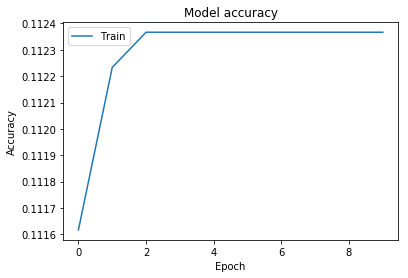

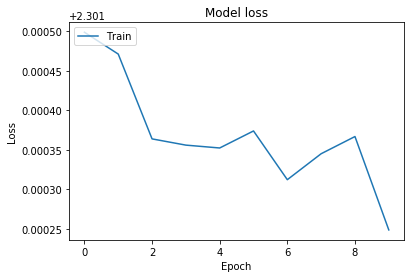

In [42]:
# Plot training accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()